## Loading Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
df = pd.read_csv('Customertravel.csv')
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


## Checking Null Values

In [3]:
df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

###### There are no null values present

## Data Exploration

In [4]:
df.shape

(954, 7)

In [5]:
df.describe()

,Age,ServicesOpted,Target
count,954.000000,954.000000,954.000000
mean,32.109015,2.437107,0.234801
std,3.337388,1.606233,0.424097
min,27.000000,1.000000,0.000000
25%,30.000000,1.000000,0.000000
50%,31.000000,2.000000,0.000000
75%,35.000000,4.000000,0.000000
max,38.000000,6.000000,1.000000


In [6]:
df.info

<bound method DataFrame.info of      Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                          

In [7]:
# Checking number of unique values in each column
df.nunique()

Age                           11
FrequentFlyer                  3
AnnualIncomeClass              3
ServicesOpted                  6
AccountSyncedToSocialMedia     2
BookedHotelOrNot               2
Target                         2
dtype: int64

In [8]:
# Checking unique values in categorical columns
col = ['FrequentFlyer', 'AnnualIncomeClass','AccountSyncedToSocialMedia', 'BookedHotelOrNot']
for x in col:
    uniq = df[x].unique()
    print(f"{x}:")
    print(uniq)
    print()

FrequentFlyer:
['No' 'Yes' 'No Record']

AnnualIncomeClass:
['Middle Income' 'Low Income' 'High Income']

AccountSyncedToSocialMedia:
['No' 'Yes']

BookedHotelOrNot:
['Yes' 'No']



# Data Preprocessing

In [9]:
# transforming values
cols = ['FrequentFlyer', 'AnnualIncomeClass','AccountSyncedToSocialMedia', 'BookedHotelOrNot']
for i in cols:
    df[i] = df[i].astype('category')
print(df.dtypes)

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object


In [10]:
# handling categorical data
cat_cols = ['FrequentFlyer', 'AnnualIncomeClass','AccountSyncedToSocialMedia', 'BookedHotelOrNot']
for column in cat_cols:
    df[column] = df[column].cat.codes

In [11]:
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


## EDA

<Axes: >

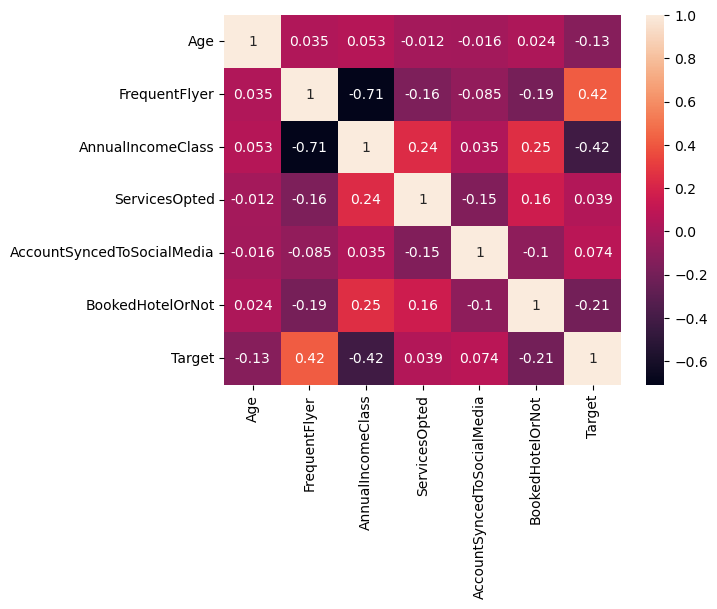

In [12]:
sns.heatmap(df.corr(),annot= True)

In [13]:
plt.style.use('seaborn-v0_8-pastel')
def plot(data, x, y):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    sns.countplot(data=data, x=x, ax=axes[0])
    
    sns.countplot(data=data, x=x, hue=y, ax=axes[1])

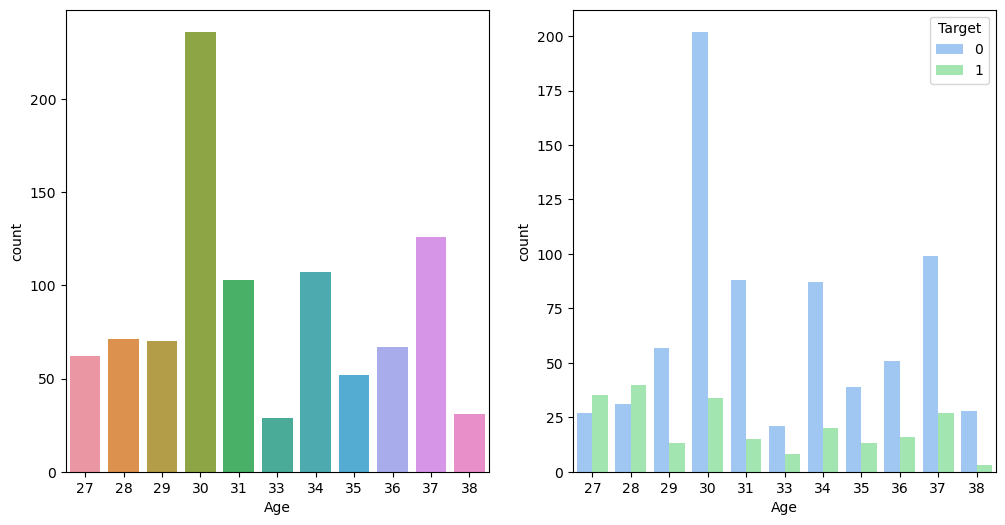

In [14]:
plot(data=df, x = 'Age', y='Target')

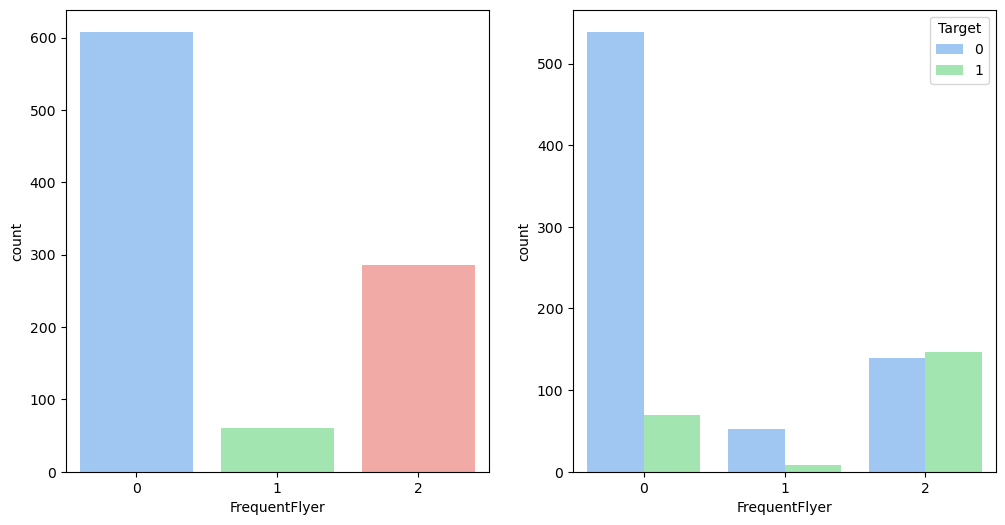

In [15]:
plot(data = df, x = 'FrequentFlyer', y= 'Target')

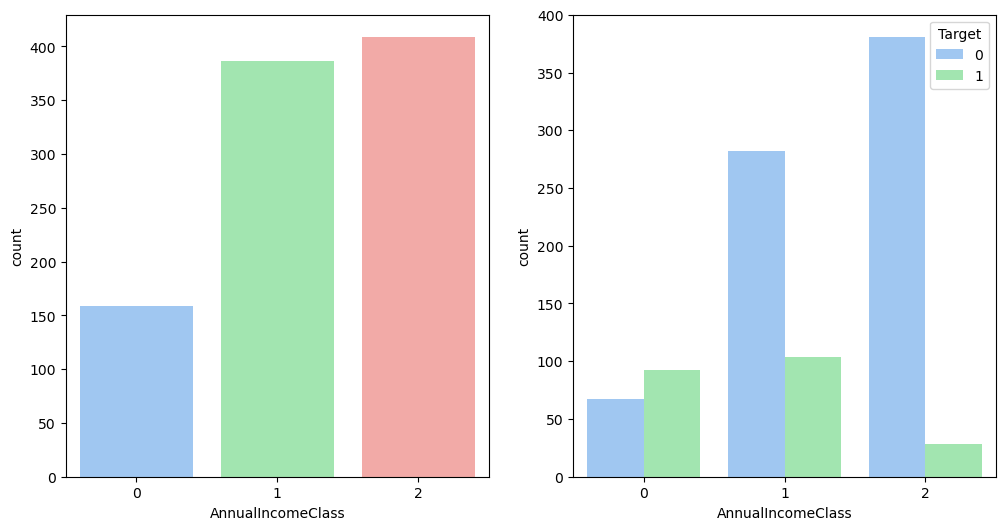

In [16]:
plot(data = df, x = 'AnnualIncomeClass', y = 'Target')

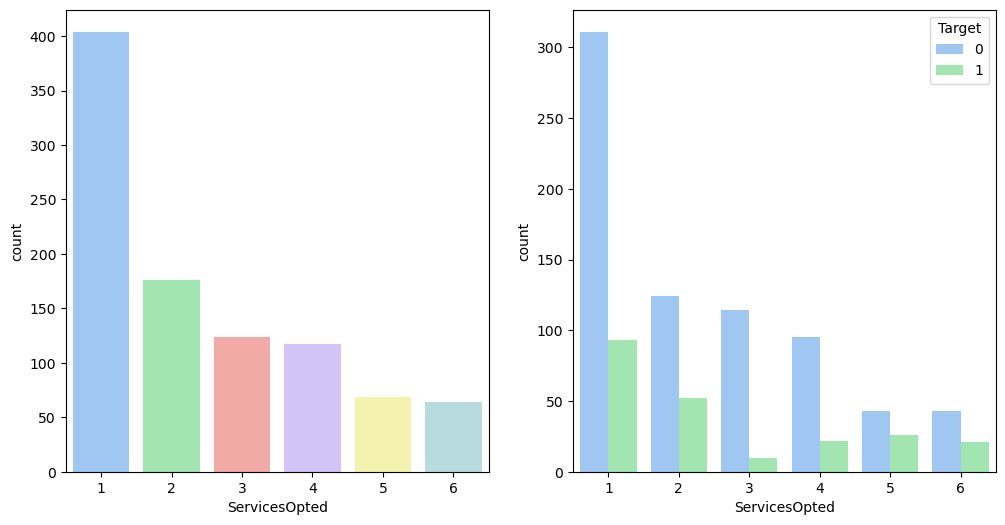

In [17]:
plot(data = df, x = 'ServicesOpted', y = 'Target')

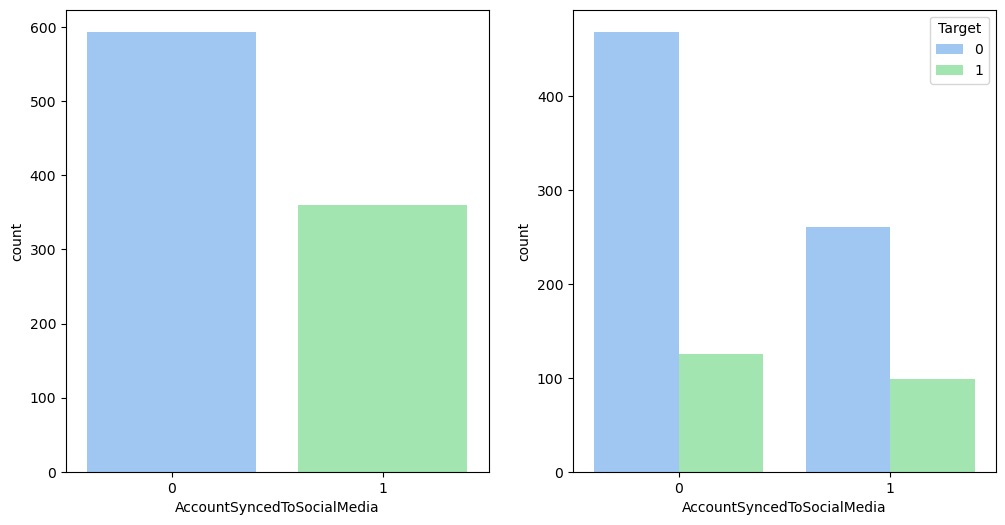

In [18]:
plot(data = df, x = 'AccountSyncedToSocialMedia', y = 'Target')

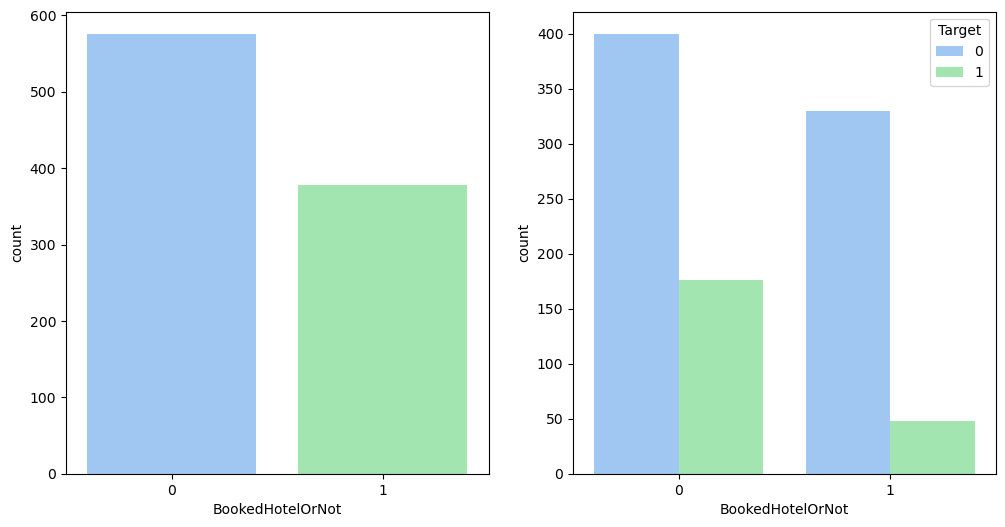

In [19]:
plot(data = df, x = 'BookedHotelOrNot', y = 'Target')

<Axes: xlabel='Target', ylabel='count'>

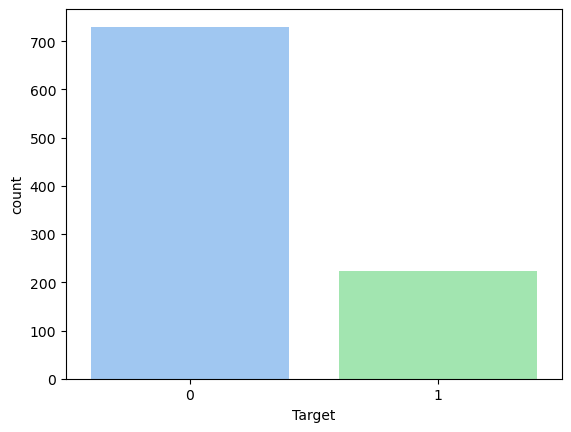

In [20]:
sns.countplot(data = df, x='Target')

## Splitting the data

In [21]:
X = df.drop('Target',axis=1)
y = df['Target']

In [22]:
X

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0
...,...,...,...,...,...,...
949,31,2,1,1,0,0
950,30,0,2,5,0,1
951,37,0,2,4,0,0
952,30,0,1,1,1,1


In [30]:
X_train , X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training data shape: (763, 6)
Testing data shape: (191, 6)
Training labels shape: (763,)
Testing labels shape: (191,)


In [32]:
y_train = y_train.values
y_test = y_test.values 

## Model building

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_predict = model.predict(X_test)

In [39]:
print("\nClassification Report:")
print(classification_report(y_test, y_predict))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       153
           1       0.70      0.55      0.62        38

    accuracy                           0.86       191
   macro avg       0.80      0.75      0.77       191
weighted avg       0.86      0.86      0.86       191



In [50]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
y_pred_rf = rf_model.predict(X_test)

In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       153
           1       0.75      0.63      0.69        38

    accuracy                           0.88       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.88      0.88      0.88       191



In [54]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [55]:
y_pred_svm = svm_model.predict(X_test)

In [56]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       153
           1       0.00      0.00      0.00        38

    accuracy                           0.80       191
   macro avg       0.40      0.50      0.44       191
weighted avg       0.64      0.80      0.71       191



C:\Users\yashika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yashika\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [59]:
y_pred_gbc = gbc.predict(X_test)

In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gbc))


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       153
           1       0.75      0.63      0.69        38

    accuracy                           0.88       191
   macro avg       0.83      0.79      0.81       191
weighted avg       0.88      0.88      0.88       191



In [61]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [62]:
y_pred_nb = nb_clf.predict(X_test)

In [63]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       153
           1       0.49      0.63      0.55        38

    accuracy                           0.80       191
   macro avg       0.70      0.73      0.71       191
weighted avg       0.82      0.80      0.80       191



In [75]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [76]:
y_pred_xgb = xgb.predict(X_test)

In [77]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       153
           1       0.81      0.66      0.72        38

    accuracy                           0.90       191
   macro avg       0.86      0.81      0.83       191
weighted avg       0.90      0.90      0.90       191



In [78]:
lr = accuracy_score(y_test,y_predict)
sv = accuracy_score(y_test,y_pred_svm)
rfc = accuracy_score(y_test,y_pred_rf)
nbc = accuracy_score(y_test,y_pred_nb)
gbcc = accuracy_score(y_test,y_pred_gbc)
xgbc = accuracy_score(y_test,y_pred_xgb)

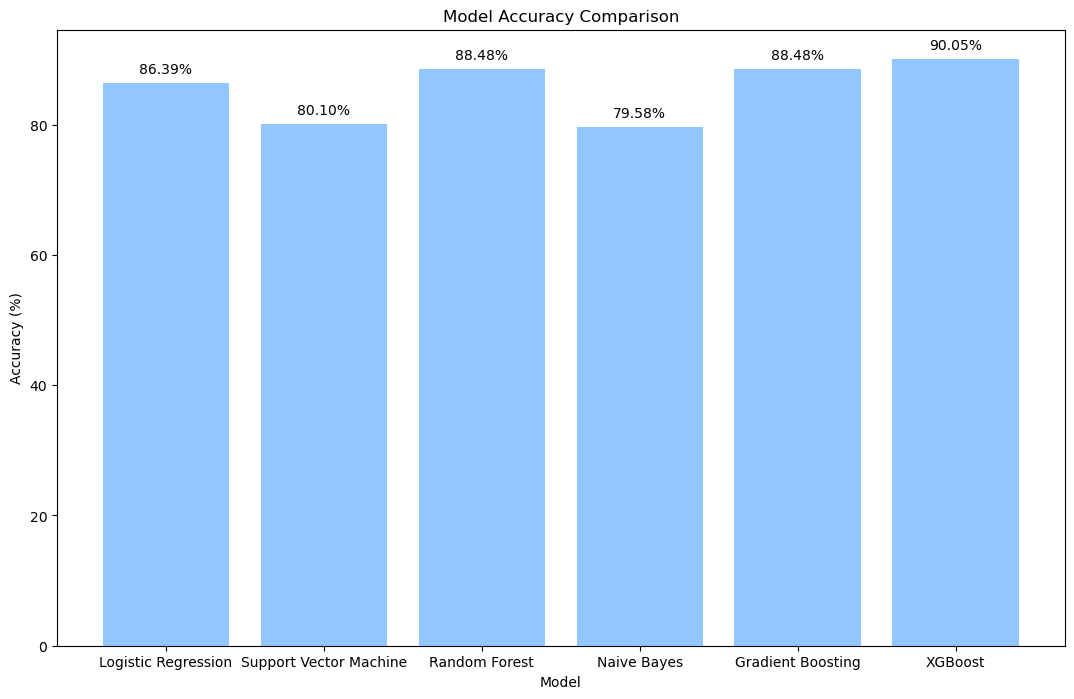

In [80]:
accuracies = {
    'Logistic Regression': lr,
    'Support Vector Machine': sv,
    'Random Forest': rfc,
    'Naive Bayes': nbc,
    'Gradient Boosting': gbcc,
    'XGBoost' : xgbc
}

# Convert accuracies to percentages
accuracies_percentages = {model: acc * 100 for model, acc in accuracies.items()}

# Create a bar plot with light colors
plt.figure(figsize=(13, 8))
bars = plt.bar(accuracies_percentages.keys(), accuracies_percentages.values())

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Add percentage annotations on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height + 1, f'{height:.2f}%', 
             ha='center', va='bottom')

# Display the plot
plt.show()
